# **<center>Dataton Septiembre 2020 - Immune Institute</center>** 

![Immune](https://i.imgur.com/0TSSaqL.png)  



¡Bienvenido al Datatón de Immune! Como ya habéis visto en el video, vuestro trabajo consiste en desarrollar un algoritmo con el que podamos averiguar las personas que padecerán del problema cardíaco causado el ataque químico. Para lograr este objetivo, usaréis un conjunto de datos de otros pacientes para poder analizar las variables necesarias y construir el modelo de machine learning que nos ayudará a detectar la enfermedad. 


**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy, Scikit-learn.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar Notebooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Clasificador*" para analizar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción.


¡Comencemos!

## **1. Importa las librerías necesarias**

Vamos ahora a descargar las herramientas necesarías para trabajar. 

**Nota:** Recuerda que para ejecutar cada celda (caja) tienes que usar **Shift+Enter**

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [5]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


c:\users\joseluisfernandez\miniconda3\envs\pycaret\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## **2. Cargar el dataset**

Para cargar los datos, debes subirlos desde la carpeta que tienes en la esquina superior izquierda. Una vez guardados, los almacenaremos en un dataframe llamado **data** 

In [3]:
data = pd.read_csv('data_reto.csv')

### 2.1 Muestra los primeros valores del archivo para hacernos una idea del contenido de la tabla con el código:

In [4]:
data.head()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,360.08,42.933,60,135,0.109620,0.15281,1.75,812,0.23413,0.65476,...,0.52618,0.003299,0.258,0.48395,2.1362,49.342,19.25,73.75,8.0208,0
1,333.41,54.733,120,150,0.149490,0.19259,2.25,740,-0.64581,0.45448,...,0.61896,0.002891,0.220,0.32814,1.5259,28.785,45.00,89.25,25.8700,0
2,359.18,46.600,90,180,0.169420,0.23900,3.00,606,0.26447,0.61511,...,0.56023,0.005732,0.302,0.34270,1.8921,32.381,28.50,78.25,13.4750,0
3,416.67,41.867,0,135,0.119590,0.15029,1.75,816,0.65061,0.65536,...,0.50644,0.003234,0.288,0.47740,1.8311,16.677,28.50,77.50,13.6130,0
4,544.08,49.333,120,120,0.099658,0.16490,2.00,792,-0.14313,0.61120,...,0.28983,0.003547,0.266,0.48095,2.0142,12.484,24.75,74.75,10.5270,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TCI     9146 non-null   float64
 1   TCSC    9146 non-null   float64
 2   exp     9146 non-null   int64  
 3   expmod  9146 non-null   int64  
 4   cm      9146 non-null   float64
 5   cvbin   9146 non-null   float64
 6   frqbin  9146 non-null   float64
 7   abin    9146 non-null   int64  
 8   kurt    9146 non-null   float64
 9   vfleak  9146 non-null   float64
 10  M       9146 non-null   float64
 11  A1      9146 non-null   float64
 12  A2      9146 non-null   float64
 13  A3      9146 non-null   float64
 14  mav     9146 non-null   float64
 15  psr     9146 non-null   float64
 16  hilb    9146 non-null   float64
 17  SamEn   9146 non-null   float64
 18  x3      9146 non-null   float64
 19  x4      9146 non-null   int64  
 20  x5      9146 non-null   float64
 21  x1      9146 non-null   float64
 22  

### 2.2 Variables

![Immune](https://i.imgur.com/Pm5M20g.png)  

El dataset consiste en un conjunto de 30 parámetros calculados a partir del Electrocardiograma (ECG). Estos parámetros, recogen distintas características del ECG, desde su comportamiento temporal como a amplitud, pendiente, etc. Hasta carácterísticas un poco más complejas como variables espectrales. A continuación, se muestra la lista completa de parámetros:

**Parámetros termporales** 

* TCI = threshold crossing interval 

* TCSC = threshold crossing sample count 

* Exp = exponencial estandard

* Expmod = exponencial modificada 

* MAV = valor medio absoluto

* count1 

* count2 

* count3

* x1

* x2

* bCP

**Parámetros espectrales** 

* vFleak = VF filter

* M

* A1

* A2

* A3

* x3

* x4

* x5

* bWT

**Parámetros de tipo tiempo-frecuencia**

* Li = basada en el análisis de ondas del ECG.

**Parámetros de complejidad del ECG** 

* CM = medida de la complejidad

* CVbin = covarianza

* abin = area

* Frqbin = frecuencia

* Kurt = Curtosis de una señal binaria extraída del ECG

* PSR = La reconstrucción del espacio de fase  

* HILB = La transformación de Hilbert

* SamEn = Muestra de entropía



### 2.3 Variable de salida

La variable que utilizaremos para clasificar los datos será **VF**. Donde:
- 0 nos indica que la persona está sana
- 1 nos indica que la persona tiene una Fibrilación Ventricular (VF). 





## **4. Analizar dataset:**

![Immune](https://i.imgur.com/FBQ64Uz.png)

Para entender la distribución de los datos, vamos a observar:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...

**a)** Utiliza la función .describe() para analizar la distribución de los datos

In [5]:
data.describe()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
count,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,...,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,504.320221,26.311054,86.337743,145.712880,0.153696,0.182451,2.793489,727.499344,6.194699,0.709490,...,0.524501,0.064652,0.581557,0.234248,5.008640,25.916175,24.271731,74.598759,11.240366,0.170129
std,262.511975,20.286627,74.512381,66.011499,0.055616,0.063978,1.310632,126.400750,5.669886,0.167951,...,0.195080,0.066675,0.261768,0.183484,2.433811,19.471469,9.173761,14.051281,8.418466,0.375767
min,121.520000,2.266700,0.000000,15.000000,0.029897,0.015760,0.000000,500.000000,-1.618400,0.114860,...,0.103090,0.000227,0.030000,0.013999,0.244140,1.004900,9.500000,39.500000,1.999400,0.000000
25%,297.872500,10.533000,30.000000,90.000000,0.109620,0.152180,1.750000,624.000000,0.690283,0.662507,...,0.388305,0.010427,0.346000,0.096474,3.356900,9.047500,17.750000,64.000000,5.608250,0.000000
50%,436.110000,17.333000,75.000000,135.000000,0.149490,0.202680,2.500000,718.000000,6.123800,0.771580,...,0.499795,0.047565,0.662000,0.177870,5.188000,22.549000,22.750000,72.500000,8.789250,0.000000
75%,631.140000,42.450250,120.000000,195.000000,0.189350,0.234860,3.750000,813.000000,9.218200,0.824950,...,0.621315,0.088832,0.796000,0.327257,6.713900,38.808500,27.750000,83.500000,13.360000,0.000000
max,1861.200000,83.867000,450.000000,375.000000,0.358770,0.250250,8.750000,984.000000,57.369000,0.917030,...,0.993650,0.323140,0.948000,1.084600,11.536000,103.180000,83.000000,123.750000,78.707000,1.000000


Escribe acá toda la información relevante que detectes de la tabla anterior:

**b)** Calcula el total de personas afectadas (VF=1) y sanas (VF=0) del dataframe

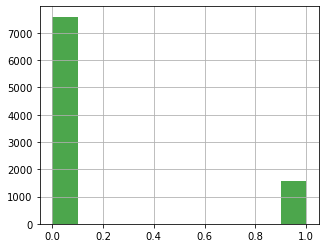

In [6]:
data["VF"].hist(figsize = (5, 4), color='g', alpha= 0.7);

El dataframe se encuentra **desbalanceado** habiendo aproximadamente 5 veces más VF=0 (p. sanas) que VF= 1

In [7]:
#Analizamos los datos faltantes
#Valores Faltantes
data.isnull().sum()

TCI       0
TCSC      0
exp       0
expmod    0
cm        0
cvbin     0
frqbin    0
abin      0
kurt      0
vfleak    0
M         0
A1        0
A2        0
A3        0
mav       0
psr       0
hilb      0
SamEn     0
x3        0
x4        0
x5        0
x1        0
x2        0
bCP       0
bWT       0
bW        0
Li        0
count1    0
count2    0
count3    0
VF        0
dtype: int64

No faltan datos en el dataset

### 4.1 Analizar las relaciones de las variables del *dataset*

Uno de los primeros pasos que debe hacer un Data Scientist es analizar si existen o no relaciones entre las variables y la salida.

-  ¿Que método usarías para analizar esta relación?
-  ¿Cual de estas variables está relacionada con **VF**, y cuál no?


**c)** Crea una matriz de correlación para analizar esta relación entre las variables.

Ayuda: puedes usar los siguientes métodos:
- .corr() 
- crr.style.background_gradient(cmap='coolwarm')



In [80]:
features = list(data.columns)
#features.remove('VF')

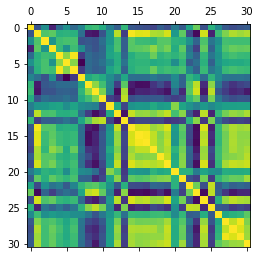

In [81]:
plt.matshow(data[features].corr())

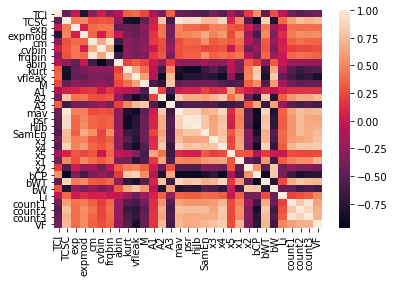

In [82]:
from seaborn import heatmap
heatmap(data[features].corr(),
           xticklabels=data[features].columns,
            yticklabels=data[features].columns);

Existen bastantes variables correlacionadas entre sí. VF, también se encuentra correlacionada con otras.  

Cuanto más cercano es el valor a 1 o -1, más correlación (lineal) existe. 

- **d)** ¿Cuáles son las variables (features) que más se relacionan con la salida (VF)?

Escribe acá toda la información que consideres relevante de la tabla anterior:



Vamos a eliminar las variables correlacionadas para simplifica el dataset, mediante el método de **Factor de inflación de la varianza (VIF)**.

In [5]:
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.to_numpy().max() > max_VIF: #Cambio de as_matrix() por values.
        col_max = np.where(VIF == VIF.to_numpy().max())[1][0] #Cambio de as_matrix() por values.
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

In [6]:
features = list(data.columns)
features.remove('VF')
model= data[features]

In [7]:
calculateVIF(model)

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3
VIF,3.089958,37.011557,3.006398,4.062981,20.596008,25.753125,22.032014,23.298609,7.531366,16.304707,...,5.050899,4.520205,7.573654,26.220578,9.170365,13.479189,2.011311,17.499429,8.271014,28.691513


In [8]:
model_data = selectDataUsingVIF(model)

In [9]:
calculateVIF(model_data)

,TCI,exp,expmod,cm,abin,kurt,M,A1,x3,x5,x1,x2,Li,count1,count2
VIF,2.73271,2.460276,3.269692,2.690926,3.045954,2.536133,3.576675,2.076604,2.818203,3.805226,2.80178,3.604415,1.499562,3.211482,4.833108


Hemos reducido de 30 parámetros a la mitad (15), reduciendo la colinealidad del conjunto de datos.  
Intentamos reducir aún más las variables eliminando características con **baja varianza** mediante el constructor `VarianceThreshold`

In [10]:
from sklearn.feature_selection import VarianceThreshold

var_th = VarianceThreshold(threshold = 0.25)
x_var = var_th.fit_transform(model_data)

print(u"Número de características originales", model_data.shape[1])
print(u"Número de características finales", x_var.shape[1])
print(u"\nListado de características originales", list(model_data.columns))#model_data['feature_names'])
print(u"Listado de características finales", model_data.columns[var_th.get_support(indices=True)])

Número de características originales 15
Número de características finales 10

Listado de características originales ['TCI', 'exp', 'expmod', 'cm', 'abin', 'kurt', 'M', 'A1', 'x3', 'x5', 'x1', 'x2', 'Li', 'count1', 'count2']
Listado de características finales Index(['TCI', 'exp', 'expmod', 'abin', 'kurt', 'M', 'x5', 'Li', 'count1',
       'count2'],
      dtype='object')


In [11]:
#Por tanto el nuevo dataset reducido a 10 variables sería:
model_data = model_data[model_data.columns[var_th.get_support(indices=True)]]

Volvemos a realizar la matriz de correlación

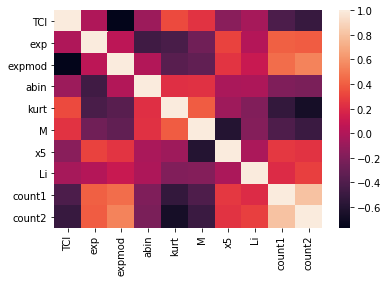

In [12]:
from seaborn import heatmap
features = list(model_data.columns)
heatmap(model_data[features].corr(),
           xticklabels=data[features].columns,
            yticklabels=data[features].columns);

Intentamos reducir un poco más las variables mediante selección univariante de las mejores características mediante el constructor `SelectKBest`

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif #métodos para clasificación

var_sk = SelectKBest(f_classif, k = 5)
x_sk = var_sk.fit_transform(model_data, data['VF'])

print(u"Número de características finales", x_sk.shape[1])
#print(u"Listado de características finales", boston['feature_names'][var_sk.get_support()])
print(u"Listado de características finales", model_data.columns[var_sk.get_support(indices=True)])

Número de características finales 5
Listado de características finales Index(['expmod', 'kurt', 'Li', 'count1', 'count2'], dtype='object')


In [14]:
#Por tanto el nuevo dataset lo volvemos a reducir a 5 variables sería:
model_data = model_data[model_data.columns[var_sk.get_support(indices=True)]]

### 4.2 Análisis descriptivo

Representaremos visualmente los datos de manera que:
- Cada punto simbolice una persona
- Un punto es amarillo si la persona tiene Fibrilación Ventricular, y azul si no lo es
- Los ejes x e y representan dos variables que queramos comparar

Función auxiliar para representar gráficas de valores del dataset

In [19]:
# FUNCION AUXILIAR; NO MODIFICAR, SOLO EJECUTAR
import plotly.offline as py
import plotly.graph_objs as go

def plot_feat1_feat2(feat1, feat2) :  
    D = data[(data['VF'] != 0)]
    H = data[(data['VF'] == 0)]
    trace0 = go.Scatter(x = D[feat1],  y = D[feat2],  name = 'VF',  mode = 'markers',  marker = dict(color = '#FFD700', line = dict(width = 1)))
    trace1 = go.Scatter(x = H[feat1],y = H[feat2], name='healthy', mode='markers', marker = dict(color = '#7EC0EE', line = dict(width = 1)))
    layout = dict(title = feat1 +" "+"vs"+" "+ feat2, yaxis = dict(title = feat2,zeroline = False),  xaxis = dict(title = feat1, zeroline = False))
    plots = [trace0, trace1]
    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

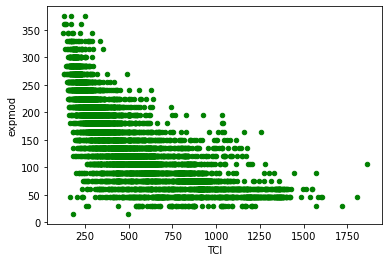

In [66]:
ax1 = data.plot.scatter(x='TCI',
                      y='expmod',
                      c='g')

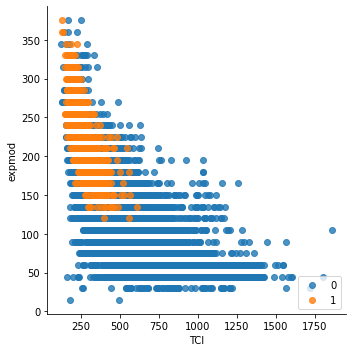

In [71]:
import seaborn as sns

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="TCI", y="expmod", data=data, fit_reg=False, hue='VF', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right');

Intenta explicar que ocurre en la función auxiliar aquí:

Ejemplo para representar información de "2 columnas" vs "la que nos interesa predecir"

**e)** Representa gráficamente la relación entre 'x4' y 'x3'


In [15]:
# La representación puede lograrse con el siguiente código:
#plot_feat1_feat2('x4','x3');

**f)** Representa gráficamente la relación entre 'tci' y 'mav'


**g)** Representa gráficamente la relación entre otras variables que consideres hayan tenido una buena correlación en la pregunta **c)**

## **5. Clasificación**

El clasificador es un algoritmo que nos va a permitir analizar un conjunto de datos y clasificarlos en grupos. 

En Machine Learning se utiliza un clasificador para el análisis de datos en [aprendizaje supervisado](https://es.wikipedia.org/wiki/Aprendizaje_supervisado).

![Clasificación](https://static.javatpoint.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png)



**Ejemplo**
- Dado un conjunto de emails, determinar cuál es spam y cuál no.
- Dado un conjunto de imágenes de animales, determinar cuáles son perros.

**Objetivo**
- En este reto, queremos lograr **clasificar** a las personas en con Fibrilación Ventricular ( VF=1) y personas sanas (VF=0). Es un ejercicio de **clasificación**.
- A continuación puede visualizarse la diferencia entre "clasificación" y "regresión"
![Clasificación vs regresión](https://res.cloudinary.com/practicaldev/image/fetch/s--c4Lfzdwy--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/mjshszqx4fj22hs12vfn.png)

**Implementación**
- Crear un conjunto de datos de entrenamiento y un conjunto de datos de test
- Crear un clasificador mediante un [tipo de algoritmo](https://www.javatpoint.com/classification-algorithm-in-machine-learning): *RandomForest, XgBoost, KNN*
- Entrenar el clasificador con los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento.
- Predecir resultados mediante nuestro set de datos de test o mediante nuevos datos.
- Determinar las conclusiones de los resultados obtenidos en las predicciones, como el % de acierto y precisión obtenida.




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#X = data.drop('VF',axis=1)
#y = data['VF']


**h)** Crea un conjunto de datos de entrenamiento y un conjunto de datos de test.

Intrucciones: 

- seed: esta variable será igual la suma de las fechas de cumpleaños de los participantes. 

- test_size: no se permite usar más del 20% de datos para crear el test
[link text](https://)

In [16]:
#seed =   #suma los cumpleños de los participantes por el número del equipo
#test_size =  #0.20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(model_data, data['VF'], random_state = 100, test_size= 0.20)

In [73]:
#Guardamos el dataset para iniciar desde este punto
model_data.to_csv('model_data.csv',index=False)
target = data['VF']
target.to_csv('target.csv', index=False)

### 👉Iniciamos desde este punto

In [8]:
model_data = pd.read_csv('model_data.csv')
target = pd.read_csv('target.csv')

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(model_data, target, random_state = 100, test_size= 0.20)

In [10]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print("La matriz de confusión es ")
    print(confusion_matrix)

    print('Precisión:', accuracy_score(y_true, y_pred))
    print('Exactitud:', precision_score(y_true, y_pred))
    print('Exhaustividad:', recall_score(y_true, y_pred))
    print('F1:', f1_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print('AUC:', auc(false_positive_rate, recall))

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

**h)** Crea el clasificador y entrénalo

In [ ]:
#Crear clasificador Regresión Logística
# Una línea de código
classif =  LogisticRegression(solver = 'liblinear')


# Entrenar el clasificador con las los datos de entrenamiento y las feature
# Una línea de código
classif.fit('completar')

### Probamos con la regresión logística

c:\users\joseluisfernandez\miniconda3\envs\pycaret\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\joseluisfernandez\miniconda3\envs\pycaret\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


La matriz de confusión es 
[[5967  111]
 [  88 1150]]
Precisión: 0.9727993439037725
Exactitud: 0.9119746233148295
Exhaustividad: 0.9289176090468497
F1: 0.9203681472589036
AUC: 0.9553275113348759


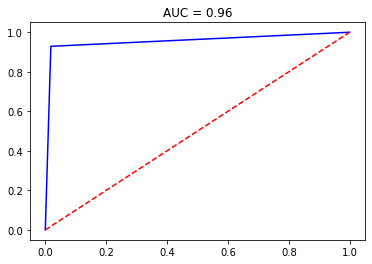

In [16]:
from sklearn.linear_model.logistic import LogisticRegression

model = LogisticRegression().fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

metricas_modelos(y_train, y_pred_train);

Vamos a comprobar que no esta sobreajustado con el test

La matriz de confusión es 
[[1483   29]
 [  24  294]]
Precisión: 0.9710382513661202
Exactitud: 0.9102167182662538
Exhaustividad: 0.9245283018867925
F1: 0.9173166926677068
AUC: 0.952674203853449


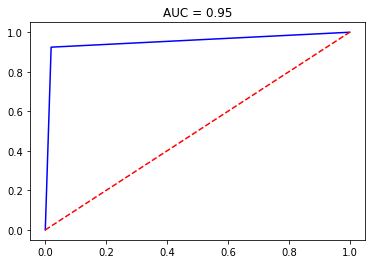

In [17]:
metricas_modelos(y_test, y_pred_test)

**g)** Predecir resultados y determinar acierto. ¡Consigue la mayor precisión posible!

In [33]:
# Aplicar classif.predict sobre los datos X de test (X_test)
# Una línea de código
#y_pred = #completar

# Mostrar resultado de la predicción del clasificador
print((len(y_test)-sum(abs(y_test-y_pred_test)))/len(y_test))

0.9759562841530055


# 4. Matriz de Confusión

La Matriz de Confusión es una métrica que nos va a permitir conocer el rendimiento y acierto de una clasificación realizada con Machine Learning.
Podemos encontrar información adicional para entender su objectivo en el siguiente enlace: [ConfusionMatrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
![texto alternativo](https://miro.medium.com/max/578/1*7EYylA6XlXSGBCF77j_rOA.png)

**h)** Crearemos una matriz de confusión para analizar las predicciones anteriores obtenidas de nuestro clasificador.

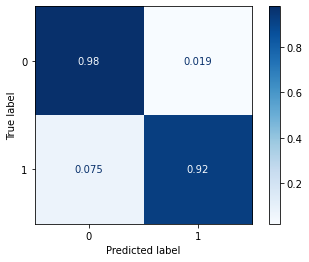

In [20]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
disp = plot_confusion_matrix(model, x_test, y_test,cmap=plt.cm.Blues,normalize = 'true')

¿Qué porcentaje de casos se situa en cada cuadrante? ¿En medicina, es peor un false positive o un false negative? Comenta aquí la matriz y responde a las preguntas:

# 5. Mejorar predicción

¿Crees que puedes mejorar la predicción?

Puedes intentar:

- Optimizar los parámetros del clasificador
- Prueba entrenar otro tipo de clasificador

In [ ]:
#Optimización de parámetros

c:\users\joseluisfernandez\miniconda3\envs\pycaret\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\joseluisfernandez\miniconda3\envs\pycaret\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\joseluisfernandez\miniconda3\envs\pycaret\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\joseluisfernandez\miniconda3\envs\pycaret\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d arr

La matriz de confusión es 
[[7325  265]
 [ 108 1448]]
Precisión: 0.9592171441067133
Exactitud: 0.8453006421482778
Exhaustividad: 0.9305912596401028
F1: 0.8858978280819823
AUC: 0.9478384493193928


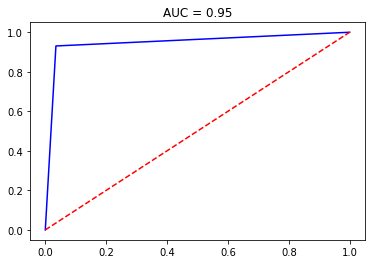

In [19]:
#Validación cruzada
from sklearn.model_selection import cross_val_predict

cv = cross_val_predict(LogisticRegression(),
                         model_data,
                         #data['VF'],
                         target,
                         cv = 10)

metricas_modelos(target, cv);
#Disminuye el rendimiento AUC: 095 frente a AUC: 0.96

### Árboles de decisión

La matriz de confusión es 
[[5993   85]
 [  86 1152]]
Precisión: 0.9766265718972116
Exactitud: 0.931285367825384
Exhaustividad: 0.9305331179321487
F1: 0.9309090909090909
AUC: 0.9582741272451134


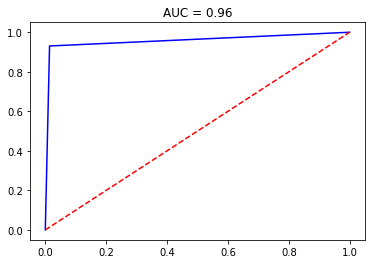

In [14]:
#Probamos otros métodos: Árboles de Decisión
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = 4, #Bajamos la profundidad para no sobreajuste
                              random_state = 0).fit(x_train, y_train)
y_pred_train = dt_classifier.predict(x_train)
y_pred_test = dt_classifier.predict(x_test)

metricas_modelos(y_train, y_pred_train);

La matriz de confusión es 
[[1481   31]
 [  27  291]]
Precisión: 0.9683060109289617
Exactitud: 0.9037267080745341
Exhaustividad: 0.9150943396226415
F1: 0.9093749999999999
AUC: 0.947295847059998


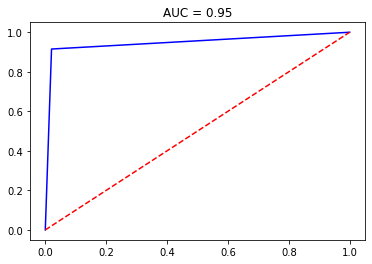

In [15]:
#Probamos el sobreajuste
metricas_modelos(y_test, y_pred_test);

Parece que limitando al profundidad del árbol conseguimos disminuir el sobreajuste del modelo.

### Random forest

La matriz de confusión es 
[[6006   72]
 [ 117 1121]]
Precisión: 0.9741662110442865
Exactitud: 0.9396479463537301
Exhaustividad: 0.9054927302100162
F1: 0.9222542163718634
AUC: 0.9468233641178413


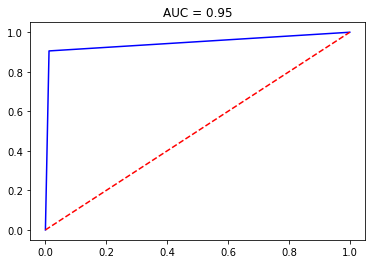

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 5,
                                       max_depth = 4,
                                       random_state = 1)
rf_classifier.fit(x_train, y_train)
y_pred_train = rf_classifier.predict(x_train)
y_pred_test = rf_classifier.predict(x_test)

metricas_modelos(y_train, y_pred_train)

La matriz de confusión es 
[[1487   25]
 [  26  292]]
Precisión: 0.9721311475409836
Exactitud: 0.9211356466876972
Exhaustividad: 0.9182389937106918
F1: 0.9196850393700788
AUC: 0.9508523010881501


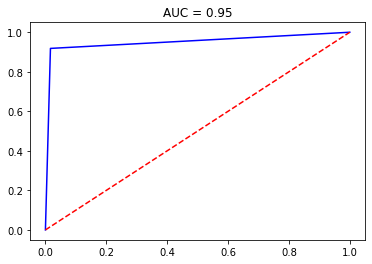

In [46]:
metricas_modelos(y_test, y_pred_test)

### Máquinas de vectores de soporte

La matriz de confusión es 
[[5969  109]
 [ 116 1122]]
Precisión: 0.9692454893384364
Exactitud: 0.9114541023558083
Exhaustividad: 0.9063004846526656
F1: 0.9088699878493318
AUC: 0.944183476942983


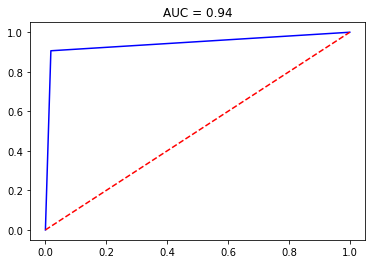

In [50]:
from sklearn.svm import SVC

svm_classifier = SVC().fit(x_train, y_train)
y_pred_train = svm_classifier.predict(x_train)
y_pred_test = svm_classifier.predict(x_test)

metricas_modelos(y_train, y_pred_train)

La matriz de confusión es 
[[1474   38]
 [  32  286]]
Precisión: 0.9617486338797814
Exactitud: 0.8827160493827161
Exhaustividad: 0.89937106918239
F1: 0.8909657320872275
AUC: 0.9371193970250574


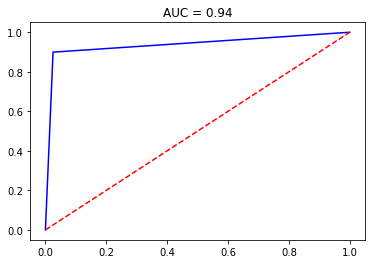

In [51]:
metricas_modelos(y_test, y_pred_test)

### Vecinos más cercanos

c:\users\joseluisfernandez\miniconda3\envs\pycaret\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


La matriz de confusión es 
[[5950  128]
 [  91 1147]]
Precisión: 0.9700656096227447
Exactitud: 0.899607843137255
Exhaustividad: 0.9264943457189014
F1: 0.9128531635495424
AUC: 0.9527173933267097


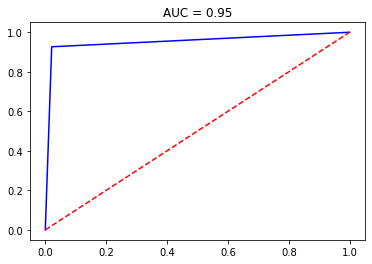

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 25)
knn_classifier.fit(x_train, y_train)
y_pred_train = knn_classifier.predict(x_train)
y_pred_test = knn_classifier.predict(x_test)

metricas_modelos(y_train, y_pred_train);

La matriz de confusión es 
[[1470   42]
 [  30  288]]
Precisión: 0.9606557377049181
Exactitud: 0.8727272727272727
Exhaustividad: 0.9056603773584906
F1: 0.8888888888888888
AUC: 0.9389412997903563


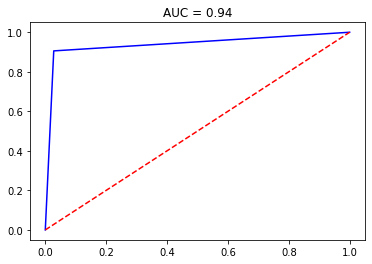

In [13]:
metricas_modelos(y_test, y_pred_test)

### Extra Trees Classifier

c:\users\joseluisfernandez\miniconda3\envs\pycaret\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La matriz de confusión es 
[[6078    0]
 [   0 1238]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


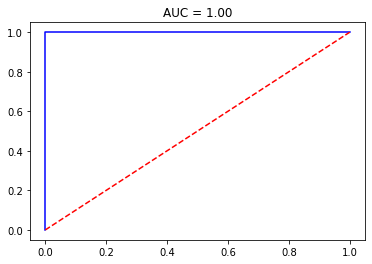

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train, y_train)
y_pred_train = etc.predict(x_train)
y_pred_test = etc.predict(x_test)

metricas_modelos(y_train, y_pred_train);

La matriz de confusión es 
[[1487   25]
 [  20  298]]
Precisión: 0.9754098360655737
Exactitud: 0.9226006191950464
Exhaustividad: 0.9371069182389937
F1: 0.9297971918876755
AUC: 0.9602862633523012


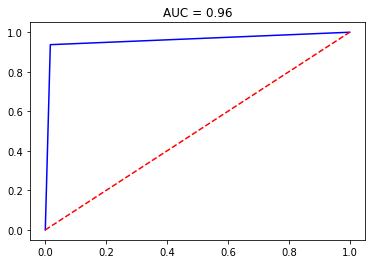

In [21]:
metricas_modelos(y_test, y_pred_test)

In [ ]:
Parece que hay algo de sobreajuste pero es el modelo con mejor rendimiento

##**EVALUACIÓN:**
Cuando termines el reto, calcula los siguientes valores para el modelo que mejor predicción obtuviste:
- BER
- Número de variables que usaste para entrenarlo

**BER**: La gran ventaja de esta métrica es que toma en consideración la tasa de error de cada clase, lo cual previene
la construcción de modelos parcializados (que favorezcan la clase mayoritaria) en conjuntos de datos desbalanceados (donde el número de muestras de cada clase es distinto). Otra ventaja de esta métrica, es que es la utilizada en el Performance Prediction Challenge (Guyon et al (2006)), por lo que nos permite comparar nuestros resultados más fácilmente

In [23]:
import sklearn.metrics as metrics
data_onu = pd.read_csv('data_onu.csv')

# list of features
features = x_train.columns 

X_onu = data_onu.drop('VF',axis=1)
y_onu = data_onu['VF']

#y_pred_onu = model.predict(X_onu[features])#Con el Árbol de decisión peor BER (model=5.68) que con Regresión logística
#y_pred_onu = rf_classifier.predict(X_onu[features])# El segundo mejor resultado con Random Forest (BER=4.5)
y_pred_onu = etc.predict(X_onu[features])# El mejor resultado con Extra Trees Classifier (BER=1.76)

BER = 1 - metrics.balanced_accuracy_score(y_onu, y_pred_onu)
variables = len(features)
print(BER*100)
print(variables)

1.764705882352935
5


Postea tus resultados en twitter usando el siguiente hashtag #DatatónIMMUNE y @immuneinstitute con el código de tu equipo.

Para poder validar tus resultados, debes adjuntar una imagen de la celda anterior